# Test workflow in R

In [34]:
getwd()
R.Version()$version.string

[1] "/home/clemens/agora/paagen/playground"

[1] "R version 4.0.4 (2021-02-15)"

In [9]:
dir.create("data")
dir.create("data/poi")

Warning message in dir.create("data"):
“'data' already exists”


In [11]:
system('trident fetch -d data -f "*2020_Margaryan_Viking*"')

In [67]:
janno_raw <- poseidonR::read_janno("data/2020_Margaryan_Viking")

Validating .janno files...

No issues with these .janno files

Reading .janno files...



In [68]:
janno_raw

source_file,Individual_ID,Collection_ID,Source_Tissue,Country,Location,Site,Latitude,Longitude,Date_C14_Labnr,⋯,Library_Built,Damage,Xcontam,Xcontam_stderr,mtContam,mtContam_stderr,Primary_Contact,Publication_Status,Note,Keywords
<chr>,<chr>,<chr>,<list>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<list>
2020_Margaryan_Viking/Margaryan_Viking.janno,VK101.SG,VK101,tooth,Iceland,Hofstadir,NA,65.61,-17.16,NA,⋯,ds,NA,NA,NA,NA,NA,"Nielsen, Rasmus; Werge, Thomas; Willerslev, Eske",MargaryanWillerslevNature2020,PASS (literature),NA
2020_Margaryan_Viking/Margaryan_Viking.janno,VK102.SG,VK102,tooth,Iceland,Hofstadir,NA,65.61,-17.16,NA,⋯,ds,NA,NA,NA,NA,NA,"Nielsen, Rasmus; Werge, Thomas; Willerslev, Eske",MargaryanWillerslevNature2020,PASS (literature),NA
2020_Margaryan_Viking/Margaryan_Viking.janno,VK108.SG,VK108,tooth,Sweden,"Malmo, Ljungbacka",NA,55.54,13.05,NA,⋯,ds,NA,NA,NA,NA,NA,"Nielsen, Rasmus; Werge, Thomas; Willerslev, Eske",MargaryanWillerslevNature2020,PASS (literature),NA
2020_Margaryan_Viking/Margaryan_Viking.janno,VK110.SG,VK110,tooth,Iceland,Hofstadir,NA,65.61,-17.16,NA,⋯,ds,NA,NA,NA,NA,NA,"Nielsen, Rasmus; Werge, Thomas; Willerslev, Eske",MargaryanWillerslevNature2020,PASS (literature),NA
2020_Margaryan_Viking/Margaryan_Viking.janno,VK111.SG,VK111,tooth,Iceland,Hofstadir,NA,65.61,-17.16,NA,⋯,ds,NA,NA,NA,NA,NA,"Nielsen, Rasmus; Werge, Thomas; Willerslev, Eske",MargaryanWillerslevNature2020,PASS (literature),NA
2020_Margaryan_Viking/Margaryan_Viking.janno,VK113.SG,VK113,tooth,Norway,"Nor Mid, Trondheim",NA,63.43,10.39,NA,⋯,ds,NA,NA,NA,NA,NA,"Nielsen, Rasmus; Werge, Thomas; Willerslev, Eske",MargaryanWillerslevNature2020,PASS (literature),NA
2020_Margaryan_Viking/Margaryan_Viking.janno,VK114.SG,VK114,tooth,Norway,"Nor Mid, Trondheim",NA,63.43,10.39,NA,⋯,ds,NA,NA,NA,NA,NA,"Nielsen, Rasmus; Werge, Thomas; Willerslev, Eske",MargaryanWillerslevNature2020,PASS (literature),NA
2020_Margaryan_Viking/Margaryan_Viking.janno,VK116.SG,VK116,tooth,Norway,"Nor Mid, Trondheim",NA,63.43,10.39,NA,⋯,ds,NA,NA,NA,NA,NA,"Nielsen, Rasmus; Werge, Thomas; Willerslev, Eske",MargaryanWillerslevNature2020,PASS (literature),NA
2020_Margaryan_Viking/Margaryan_Viking.janno,VK117.SG,VK117,tooth,Norway,"Nor Mid, Trondheim",NA,63.43,10.39,NA,⋯,ds,NA,NA,NA,NA,NA,"Nielsen, Rasmus; Werge, Thomas; Willerslev, Eske",MargaryanWillerslevNature2020,PASS (literature),NA


In [70]:
library(magrittr)
# Nr_autosomal_SNPs: should be >= 20000 SNPs
janno_QC <- janno_raw %>% dplyr::filter(
  Nr_autosomal_SNPs >= 20000
)
# Xcontam: if male, then should not be higher then 10%
janno_QC <- janno_QC %>% dplyr::filter(
  is.na(Xcontam) | Genetic_Sex == "F" | (Genetic_Sex == "M" & Xcontam < 0.1)
)
# Genetic_Sex: Individuals with unknown genetic sex should be removed
janno_QC <- janno_QC %>% dplyr::filter(Genetic_Sex != "U")
# Indicated as contaminated: Individuals which are indicated as potentially contaminated
# in their ID should be removed
janno_QC <- janno_QC %>% dplyr::filter(
  !grepl("cont|excluded", x = Individual_ID, ignore.case = T)
)

In [107]:
nrow(janno_QC)

[1] 416

In [74]:
# store ind list for poseidon extraction
tibble::tibble(
  #pop = sapply(janno_filtered_final$Group_Name, function(x) { x[[1]] }),
  ind = paste0("<", sort(janno_QC$Individual_ID), ">")
) %>% 
  readr::write_delim(
    file = "data/ind_list.txt",
    delim = " ",
    col_names = FALSE
  )

In [76]:
system('trident forge --forgeFile data/ind_list.txt -d data/2020_Margaryan_Viking -n viking_qc -o data/viking_qc')

In [15]:
system('paagen gen -d data/viking_qc --time 1200 --latitude 41.4 --longitude 15.6 -o data/poi --outFormat PLINK')

In [53]:
system('trident init --inFormat PLINK --genoFile data/poi/poi.bed --snpFile data/poi/poi.bim --indFile data/poi/poi.fam -o data/poi_poseidon -n poi')

In [83]:
system('trident forge -d data/viking_qc -d data/poi_poseidon -f "*viking_qc*,*poi*" -o data/merged -n merged')

In [84]:
# pruning
dir.create("data/merged_pruned")
system('plink1.9 --bfile data/merged/merged --exclude data/myrange.txt --range --maf --make-bed --out data/merged_pruned/merged.pruned')

In [85]:
# generate general pairwise stats
dir.create("data/merge_pruned_distances")
system('plink1.9 --bfile data/merged_pruned/merged.pruned --genome --out data/merge_pruned_distances/merged.pruned')

In [86]:
# create mds table
dir.create("data/mds")
system('plink1.9 --bfile data/merged_pruned/merged.pruned --cluster --mds-plot 2 --read-genome data/merge_pruned_distances/merged.pruned.genome --out data/mds/mds')

In [87]:
mds <- readr::read_delim("data/mds/mds.mds", " ", trim_ws = T) %>%
  dplyr::select(-X6)

Warning message:
“Missing column names filled in: 'X6' [6]”

── Column specification ──────────────────────────────────────────────────────────────────────
cols(
  FID = col_character(),
  IID = col_character(),
  SOL = col_double(),
  C1 = col_double(),
  C2 = col_double(),
  X6 = col_logical()
)




In [88]:
mds

FID,IID,SOL,C1,C2
<chr>,<chr>,<dbl>,<dbl>,<dbl>
group_of_poi,poi,0,-1.07629e-01,0.016453100
Iceland_Viking.SG,VK101.SG,0,2.62030e-03,-0.001872310
Iceland_Viking.SG,VK102.SG,0,4.57928e-03,-0.003929240
Sweden_Viking.SG,VK108.SG,0,-2.28990e-02,0.000918702
Iceland_Viking.SG,VK110.SG,0,5.62935e-03,-0.011723300
Iceland_Viking.SG,VK111.SG,0,9.10007e-03,-0.012612800
Norway_Medieval_o.SG,VK113.SG,0,-2.50281e-03,-0.000134843
Norway_Medieval.SG,VK114.SG,0,-3.31583e-03,-0.000842472
Norway_Medieval.SG,VK117.SG,0,1.30625e-03,0.006585580


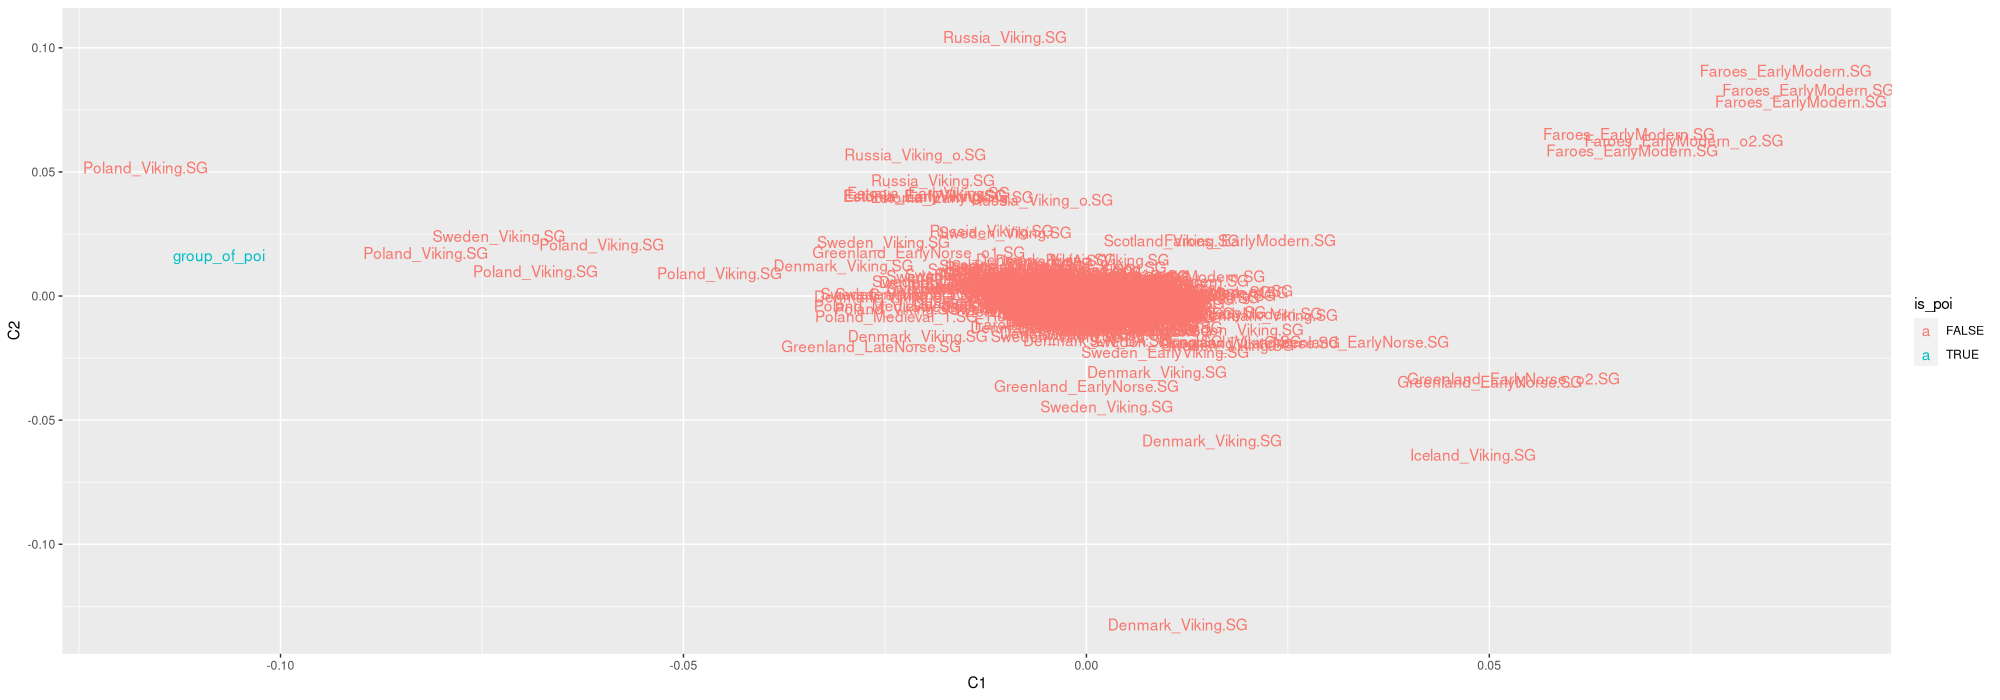

In [106]:
library(ggplot2)
options(repr.plot.width = 20, repr.plot.height = 7, repr.plot.res = 100)

mds %>%
dplyr::mutate(
    is_poi = IID == "poi"
) %>% 
ggplot() +
geom_text(aes(x = C1, y = C2, color = is_poi, label = FID))